# **Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('telco.csv',sep=';')

### First Checking

In [2]:
df.shape

(7043, 21)

In [3]:
df.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.00,12,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.8,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [5]:
#mengubah totalcharges menjadi float
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')
df.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [6]:
df['seniorcitizen'] = df['seniorcitizen'].astype('object')

In [7]:
churn_clean = {'churn' :{'Yes' : 1, 'No': 0}}
df.replace(churn_clean,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   object 
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


# **Data Cleansing**

### Duplicate

In [9]:
df.duplicated().any()

False

##### Checking for duplicate

In [10]:
df[df.duplicated()==False].shape[0]

7043

### Missing Values

In [11]:
df.isnull().sum()

customerid           0
region               0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [12]:
df[df['totalcharges'].isnull()]

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7032,2923-ARZLG,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,19.70,NaN,0
7033,7644-OMVMY,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,19.85,NaN,0
7034,2520-SGTTA,Germany,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,20.00,NaN,0
7035,3115-CZMZD,Germany,Male,0,No,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,20.25,NaN,0
7036,3213-VVOLG,Germany,Male,0,Yes,Yes,2,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,25.35,NaN,0
7037,4367-NUYAO,Germany,Male,0,Yes,Yes,1,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,25.75,NaN,0
7038,4472-LVYGI,Germany,Female,0,Yes,Yes,2,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Yes,Bank transfer (automatic),52.55,NaN,0
7039,1371-DWPAZ,Germany,Female,0,Yes,Yes,2,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,No,Credit card (automatic),56.05,NaN,0
7040,2775-SEFEE,Germany,Male,0,No,Yes,3,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Yes,Bank transfer (automatic),61.90,NaN,0
7041,4075-WKNIU,Germany,Female,0,Yes,Yes,3,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,No,Mailed check,73.35,NaN,0


### Handling Missing Value

In [13]:
df['totalcharges'].isnull().any()

True

C:\Users\niken\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\niken\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.356e+03, 1.268e+03, 9.830e+02, 4.170e+02, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([1.200000e+01, 2.245360e+03, 4.478720e+03, 6.712080e+03,
        8.945440e+03, 1.117880e+04, 1.341216e+04, 1.564552e+04,
        1.787888e+04, 2.011224e+04, 2.234560e+04]),
 <a list of 10 Patch objects>)

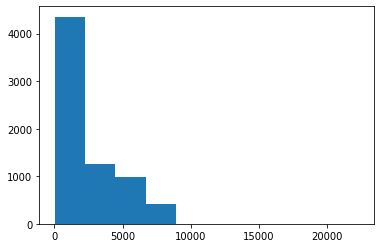

In [14]:
plt.hist(df['totalcharges'])

In [15]:
totalcharges_mean = df['totalcharges'].mean()
totalcharges_mean

2294.2759186575686

In [16]:
totalcharges_median = df['totalcharges'].median()
totalcharges_median

1397.475

In [17]:
df['totalcharges'] = df['totalcharges'].fillna(totalcharges_median)

In [18]:
df['totalcharges'].isnull().any()

False

### Outliers

In [19]:
df.describe()

,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.401107,64.751874,2292.875264,0.265370
std,24.606849,30.097858,2315.221897,0.441561
min,1.000000,12.000000,12.000000,0.000000
25%,9.000000,35.500000,402.225000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3793.050000,1.000000
max,120.000000,118.750000,22345.600000,1.000000


In [20]:
df.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.00,12.00,0
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13.00,0
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.80,0
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,0
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,1


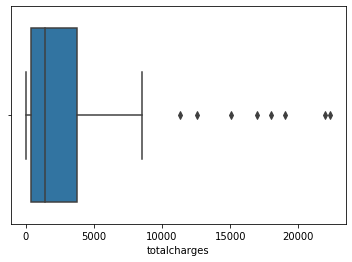

In [21]:
sns.boxplot(df['totalcharges'])

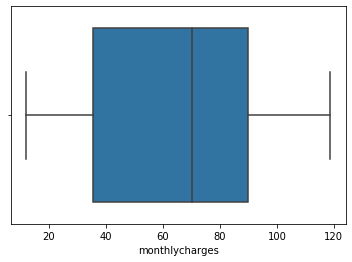

In [22]:
sns.boxplot(df['monthlycharges'])

# **Data Understanding**

### Make Some Plot

(array([4.367e+03, 1.268e+03, 9.830e+02, 4.170e+02, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([1.200000e+01, 2.245360e+03, 4.478720e+03, 6.712080e+03,
        8.945440e+03, 1.117880e+04, 1.341216e+04, 1.564552e+04,
        1.787888e+04, 2.011224e+04, 2.234560e+04]),
 <a list of 10 Patch objects>)

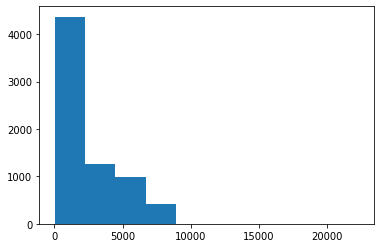

In [23]:
plt.hist(df['totalcharges'])

(array([1185.,  507.,  235.,  663.,  577.,  901.,  979.,  886.,  784.,
         326.]),
 array([ 12.   ,  22.675,  33.35 ,  44.025,  54.7  ,  65.375,  76.05 ,
         86.725,  97.4  , 108.075, 118.75 ]),
 <a list of 10 Patch objects>)

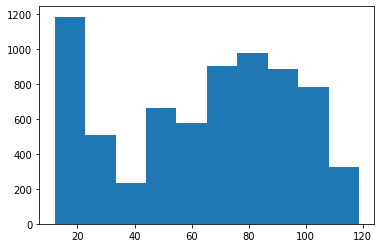

In [24]:
plt.hist(df['monthlycharges'])

(array([2.186e+03, 1.024e+03, 8.310e+02, 7.610e+02, 8.320e+02, 1.406e+03,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <a list of 10 Patch objects>)

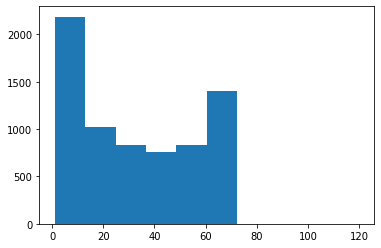

In [25]:
plt.hist(df['tenure'])

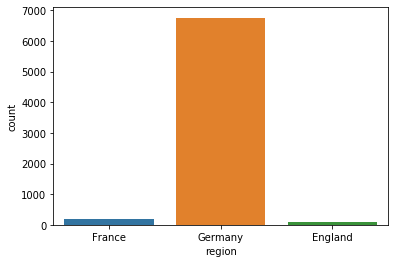

In [26]:
sns.countplot(df['region'])

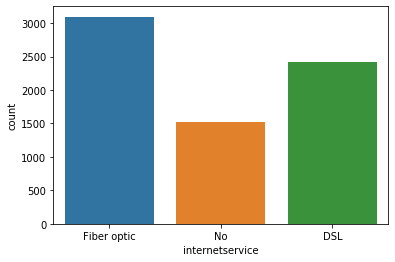

In [27]:
sns.countplot(df['internetservice'])

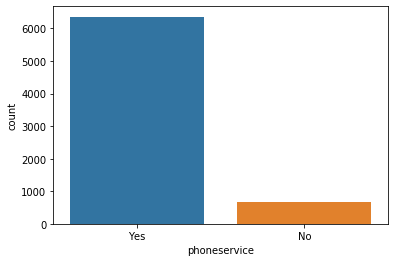

In [28]:
sns.countplot(df['phoneservice'])

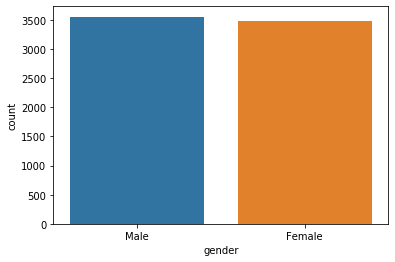

In [29]:
sns.countplot(df['gender'])

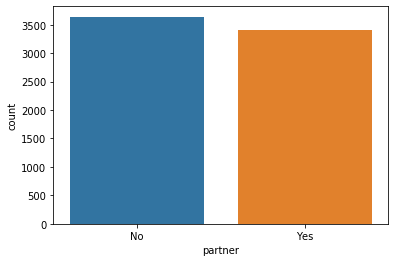

In [30]:
sns.countplot(df['partner'])

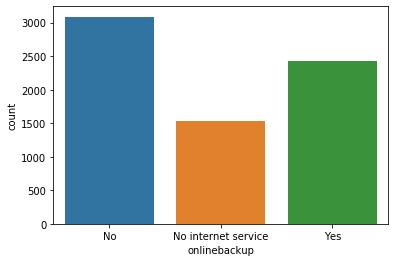

In [31]:
sns.countplot(df['onlinebackup'])

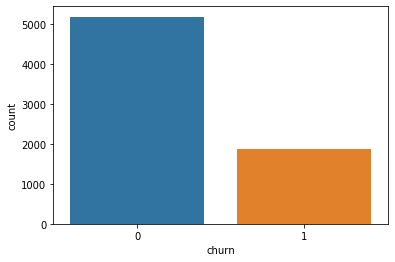

In [32]:
sns.countplot(df['churn'])

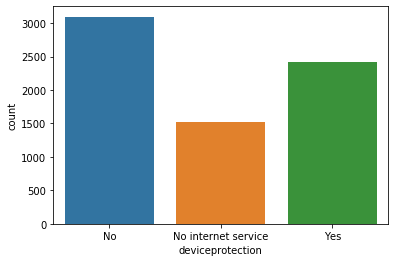

In [33]:
sns.countplot(df['deviceprotection'])

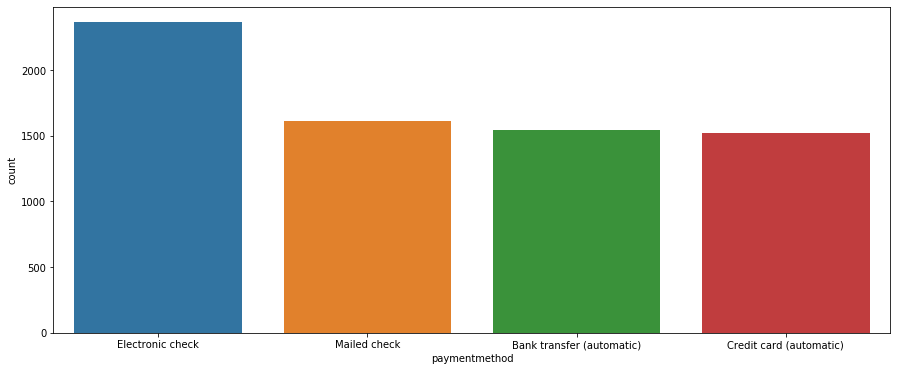

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(df['paymentmethod'])

# EDA

### Why customer Churn in the past ?

### Customer 

##### Data Numerics

In [35]:
df.describe().round()

,tenure,monthlycharges,totalcharges,churn
count,7043.0,7043.0,7043.0,7043.0
mean,32.0,65.0,2293.0,0.0
std,25.0,30.0,2315.0,0.0
min,1.0,12.0,12.0,0.0
25%,9.0,36.0,402.0,0.0
50%,29.0,70.0,1397.0,0.0
75%,55.0,90.0,3793.0,1.0
max,120.0,119.0,22346.0,1.0


**Note**
1. Ada beberapa customer yang bertahan lebih dari 55 bulan. 
2. Rata rata monthly charges adalah 65.0 
3. Rata rata total Charges adalah 2293.0

In [36]:
df.describe(include='object')

,customerid,region,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4
top,7730-CLDSV,Germany,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
freq,1,6761,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,4171,2365


**Note**
1. Region yang paling banyak memakai telco adalah germany
2. Gender yang paling banyak menggunakan adalah male
3. internet service yang paling banyak dipakai adalah fiber optic
4. Payment method yang banyak digunakan adalah Electronic check

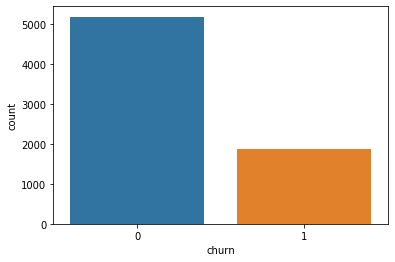

In [37]:
sns.countplot(df['churn']) #0= no , 1= yes

In [38]:
label = df['churn']

In [39]:
df_corr = df

In [40]:
df_corr.corr()

,tenure,monthlycharges,totalcharges,churn
tenure,1.000000,0.248350,0.815820,-0.350766
monthlycharges,0.248350,1.000000,0.644479,0.193502
totalcharges,0.815820,0.644479,1.000000,-0.195899
churn,-0.350766,0.193502,-0.195899,1.000000


Text(0.5, 1, 'Variable Correlation Heatmap')

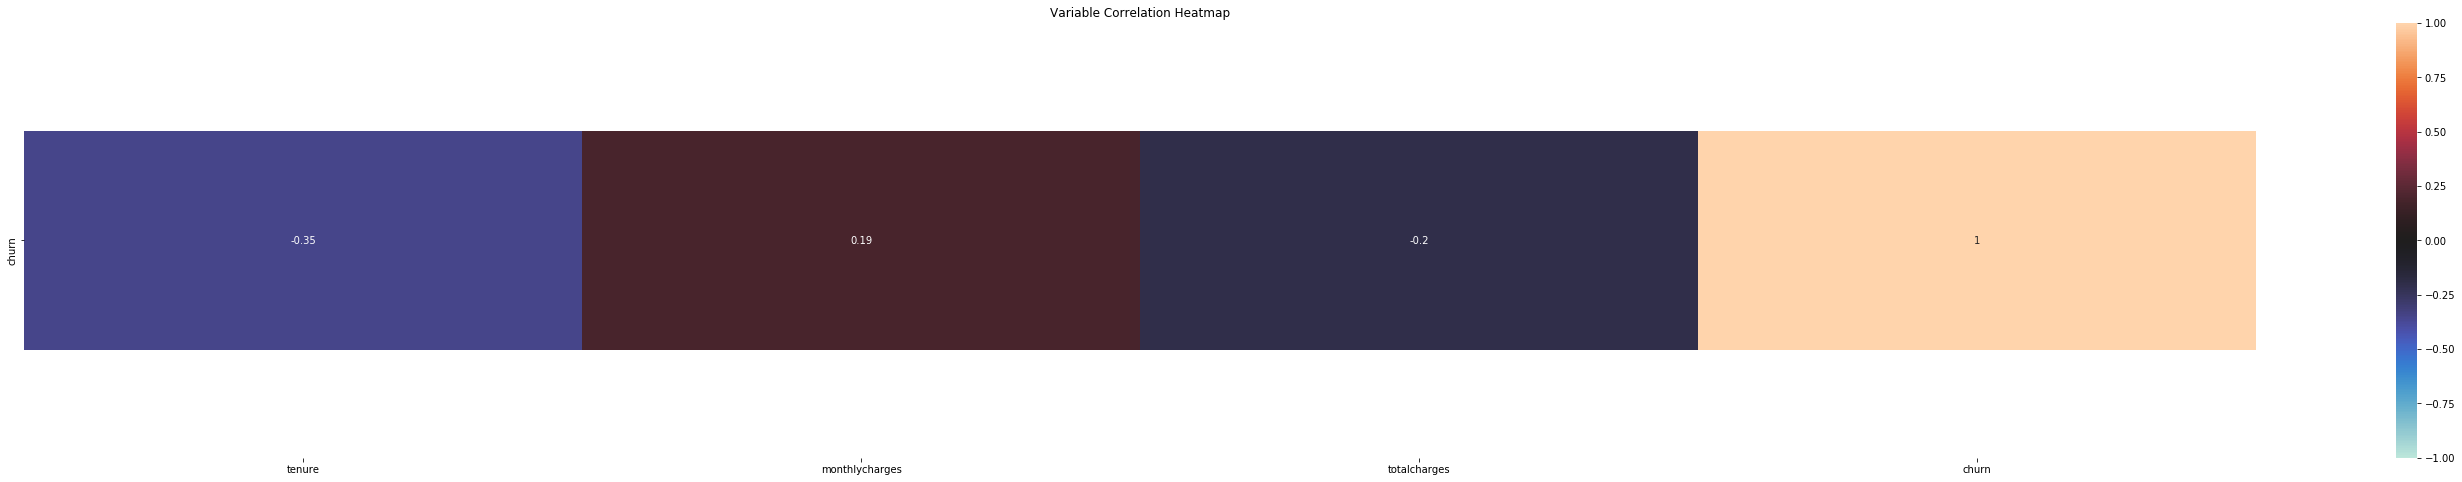

In [41]:
corr = df_corr.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(50,8))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Variable Correlation Heatmap')

**Note**
1. tenure mempunyai korelasi high negatif (-0.35)
2. monthlycharges mempunyai korelasi high positif (0.19)
3. totalcharges mempunyai korelasi low negatif(-0.2)
**tenure dan monthlycharges punya korelasi yang kuat terhadap churn.**

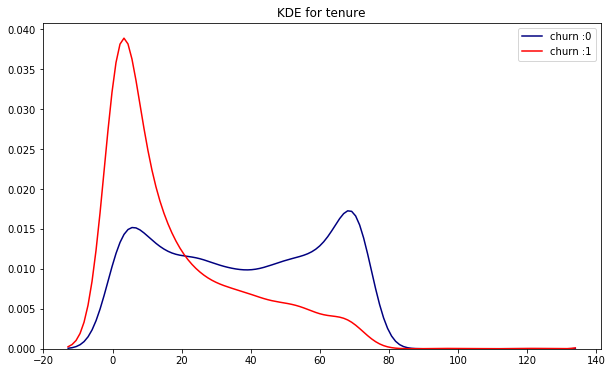

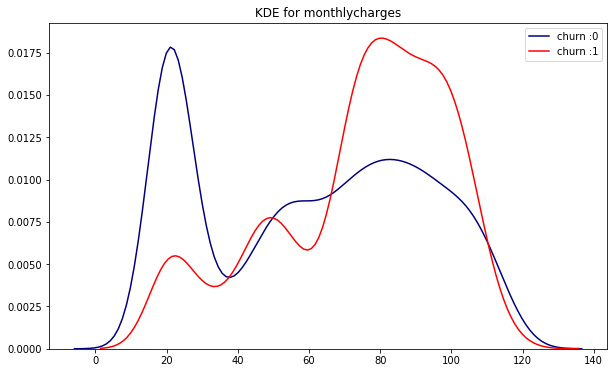

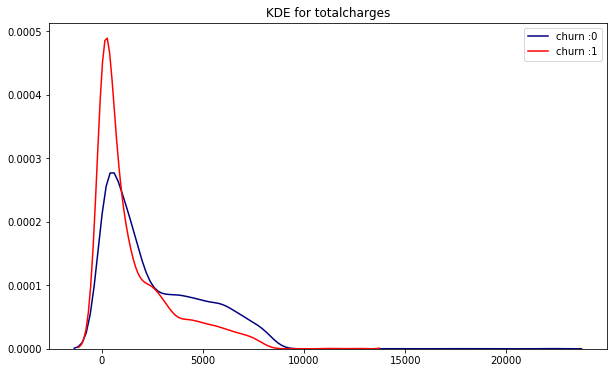

In [42]:
def kdeplot(feature):
    plt.figure(figsize=(10,6))
    plt.title('KDE for {}'.format(feature))
    ax0 = sns.kdeplot(df[df['churn']== 0][feature],color = 'navy', label='churn :0')
    ax1 = sns.kdeplot(df[df['churn']== 1][feature],color = 'red', label='churn :1')
kdeplot('tenure')
kdeplot('monthlycharges')
kdeplot('totalcharges')

**note : ketika monthlycharges naik, churn juga meningkat**

#### Data Category

In [43]:
df.describe(include='object')

,customerid,region,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4
top,7730-CLDSV,Germany,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
freq,1,6761,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,4171,2365


In [44]:
pd.crosstab(df.churn, df.seniorcitizen, margins=True)

seniorcitizen,0,1,All
churn,,,
0,4508,666,5174
1,1393,476,1869
All,5901,1142,7043


In [45]:
print ('jumlah senior yang churn adalah sekitar {}%'.format(476/1142*100))
print ('jumlah non-senior yang churn adalah sekitar {}%'.format(1393/5901*100))

jumlah senior yang churn adalah sekitar 41.68126094570928%
jumlah non-senior yang churn adalah sekitar 23.606168446026096%


In [46]:
print ('jumlah senior yang tidak churn adalah sekitar {}%'.format(666/1142*100))
print ('jumlah non-senior yang tidak churn adalah sekitar {}%'.format(4508/5901*100))

jumlah senior yang tidak churn adalah sekitar 58.31873905429072%
jumlah non-senior yang tidak churn adalah sekitar 76.3938315539739%


**Note :  churn paling banyak dialami oleh senior daripada non-senior, dengan selisih sekitar kurang lebih 18%**

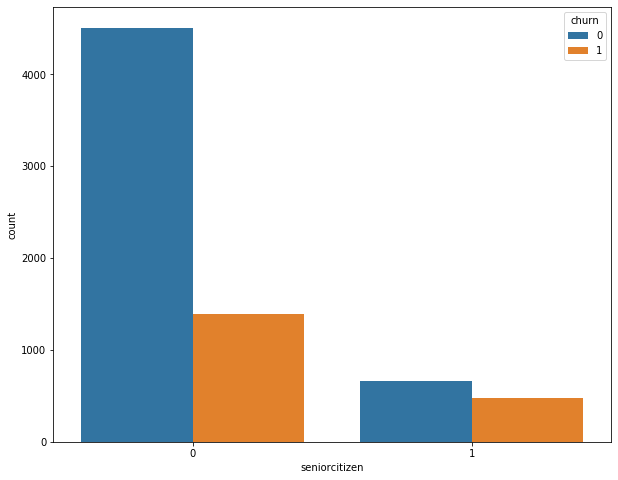

In [47]:
plt.figure(figsize=(10,8))

sns.countplot(df.seniorcitizen, hue=df.churn) #0=no 1=yes

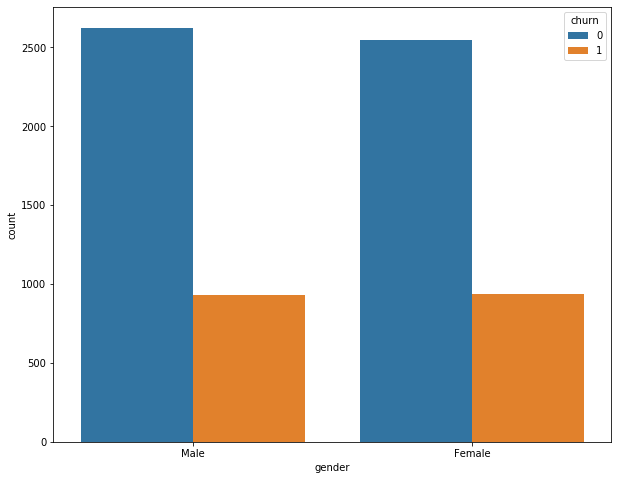

In [48]:
plt.figure(figsize=(10,8))

sns.countplot(df.gender, hue=df.churn) #0=no 1=yes

In [49]:
gender_charges = df.groupby(['gender'])[['totalcharges','monthlycharges']].mean().round()
gender_charges

,totalcharges,monthlycharges
gender,,
Female,2293.0,65.0
Male,2293.0,64.0


In [50]:
gender_tenure = df.groupby(['gender'])['tenure'].mean().round()
gender_tenure

gender
Female    32.0
Male      33.0
Name: tenure, dtype: float64

**Note : Pengguna laki laki lebih banyak**

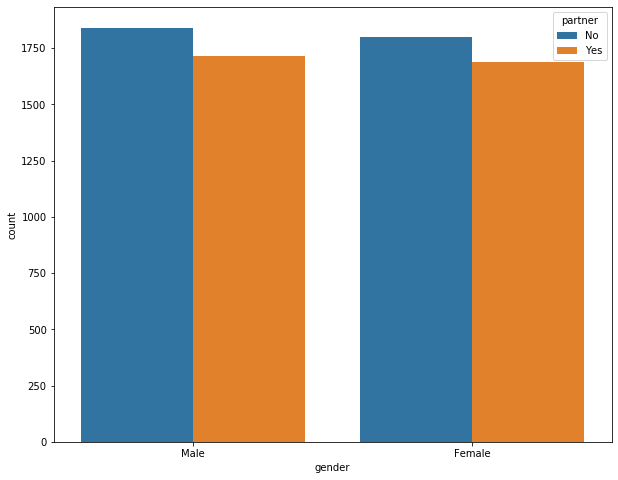

In [51]:
plt.figure(figsize=(10,8))

sns.countplot(df.gender, hue=df.partner)

In [52]:
 pd.crosstab(df.gender, df.partner,margins=True)

partner,No,Yes,All
gender,,,
Female,1800,1688,3488
Male,1841,1714,3555
All,3641,3402,7043


In [53]:
print ('jumlah pria yang memiliki partner adalah sekitar {}%'.format(1714/3402*100))
print ('jumlah wanita yang memiliki partner adalah sekitar {}%'.format(1688/3402*100))
print ('\n===============================')
print ('jumlah pria yang tidak memiliki partner adalah sekitar {}%'.format(1841/3402*100))
print ('jumlah wanita yang tidak memiliki partner adalah sekitar {}%'.format(1800/3402*100))

jumlah pria yang memiliki partner adalah sekitar 50.38212815990594%
jumlah wanita yang memiliki partner adalah sekitar 49.61787184009406%

jumlah pria yang tidak memiliki partner adalah sekitar 54.11522633744856%
jumlah wanita yang tidak memiliki partner adalah sekitar 52.910052910052904%


In [54]:
pd.crosstab(df.churn, [df.gender,df.partner],margins=True)

gender  Female        Male         All
partner     No   Yes    No   Yes      
churn                                 
0         1180  1369  1261  1364  5174
1          620   319   580   350  1869
All       1800  1688  1841  1714  7043

In [55]:
print ('jumlah pria yang tidak memiliki partner dan churn adalah sekitar {}%'.format(580/1841*100)) 
print ('jumlah wanita yang tidak memiliki partner dan churn adalah sekitar {}%'.format(620/1800*100))

print ('\n===================================================================')

print ('jumlah pria yang memiliki partner dan churn adalah sekitar {}%'.format(350/1714*100))
print ('jumlah wanita yang memiliki partner dan churn adalah sekitar {}%'.format(391/1688*100))

print ('\n===================================================================')

print ('jumlah pria yang tidak memiliki partner dan tidak churn adalah sekitar {}%'.format(1261/1841*100))
print ('jumlah wanita yang tidak memiliki partner dan tidak churn adalah sekitar {}%'.format(1180/1800*100))

print ('\n===================================================================')

print ('jumlah pria yang memiliki partner dan tidak churn adalah sekitar {}%'.format(1364/1714*100))
print ('jumlah wanita yang memiliki partner dan tidak churn adalah sekitar {}%'.format(1369/1688*100))


jumlah pria yang tidak memiliki partner dan churn adalah sekitar 31.504617055947854%
jumlah wanita yang tidak memiliki partner dan churn adalah sekitar 34.44444444444444%

jumlah pria yang memiliki partner dan churn adalah sekitar 20.420070011668614%
jumlah wanita yang memiliki partner dan churn adalah sekitar 23.163507109004737%

jumlah pria yang tidak memiliki partner dan tidak churn adalah sekitar 68.49538294405214%
jumlah wanita yang tidak memiliki partner dan tidak churn adalah sekitar 65.55555555555556%

jumlah pria yang memiliki partner dan tidak churn adalah sekitar 79.57992998833139%
jumlah wanita yang memiliki partner dan tidak churn adalah sekitar 81.10189573459715%


**Note :**
1. Jumlah churn pada pria atau wanita yang tidak memiliki partner lebih banyak dibandingkan yang memiliki partner.
2. Pria atau wanita yang memiliki partner cenderung tidak churn

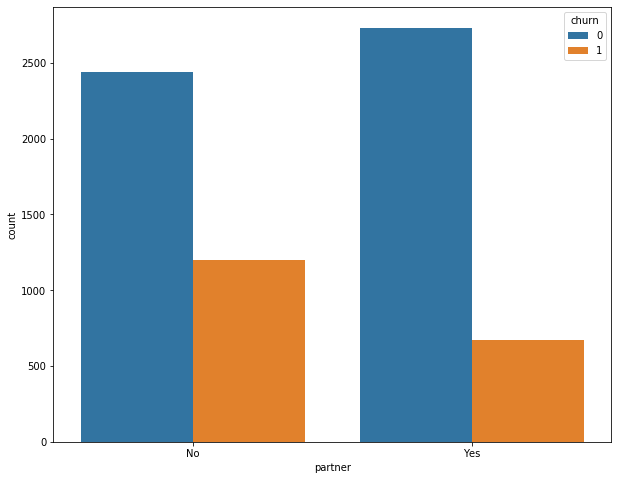

In [56]:
plt.figure(figsize=(10,8))

sns.countplot(df.partner, hue=df.churn)

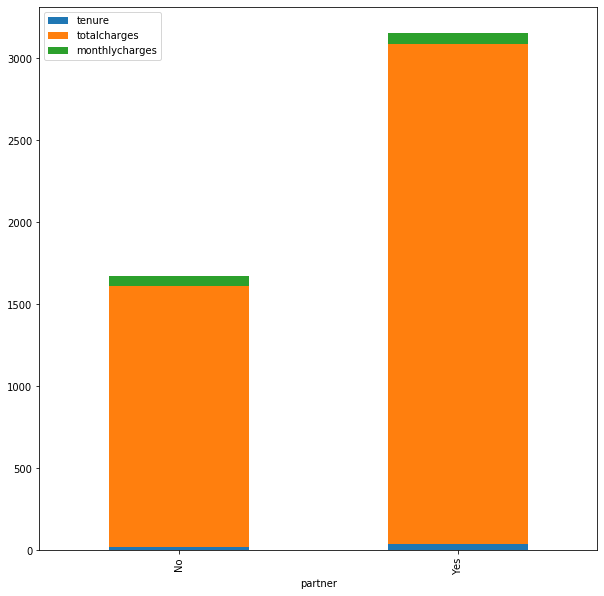

In [57]:
partner_checks = df.groupby(['partner'])[['tenure','totalcharges','monthlycharges']].mean().plot(kind='bar',stacked=True,figsize=(10,10))
partner_checks

**Note : total charges paling banyak berada pada customer yang memiliki partner**

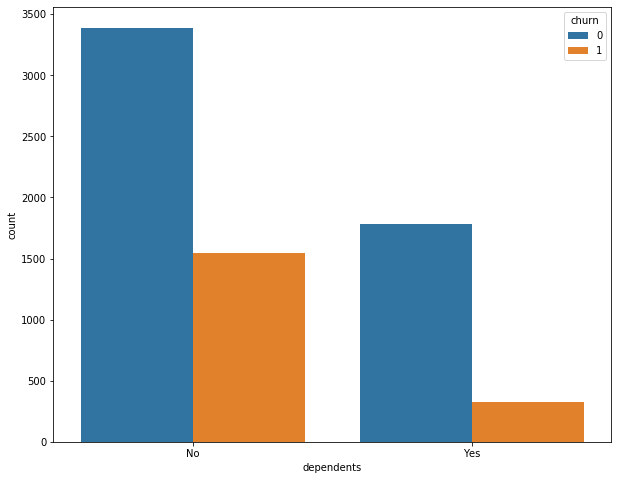

In [58]:
plt.figure(figsize=(10,8))

sns.countplot(df.dependents, hue=df.churn)

In [59]:
pd.crosstab(df.churn,df.dependents,margins=True)

dependents,No,Yes,All
churn,,,
0,3390,1784,5174
1,1543,326,1869
All,4933,2110,7043


In [60]:
print ('jumlah customer yang memiliki dependents(family member) dan churn adalah sekitar {}%'.format(326/2110*100)) 
print ('jumlah customer yang tidak memiliki dependents(family member) dan churn adalah sekitar {}%'.format(1543/4933*100))

jumlah customer yang memiliki dependents(family member) dan churn adalah sekitar 15.450236966824646%
jumlah customer yang tidak memiliki dependents(family member) dan churn adalah sekitar 31.279140482465028%


**Note : customer yang churn biasanya tidak memiliki dependents(family member)**

### Product

In [61]:
df.describe(include=object)

,customerid,region,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4
top,7730-CLDSV,Germany,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
freq,1,6761,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,4171,2365


### #1. phone Service

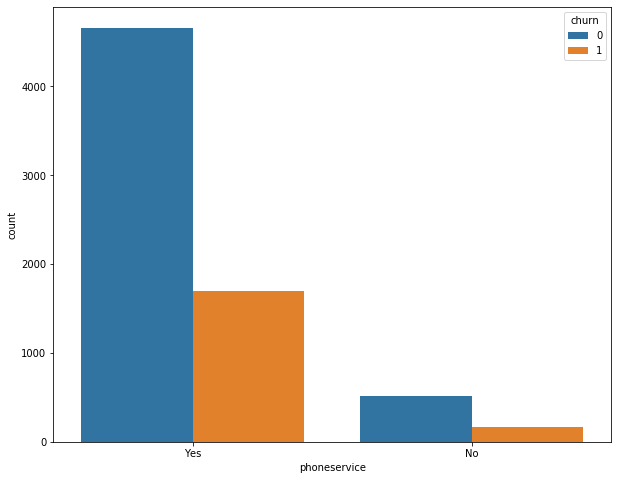

In [62]:
plt.figure(figsize=(10,8))

sns.countplot(df.phoneservice, hue=df.churn)

In [63]:
pd.crosstab(df.churn, df.phoneservice, margins=True)

phoneservice,No,Yes,All
churn,,,
0,512,4662,5174
1,170,1699,1869
All,682,6361,7043


In [64]:
print ('customer yang churn dengan phone service adalah  {}%'.format(1699/6361*100)) 
print ('customer yang churn dengan no phone service {}%'.format(170/682*100))

customer yang churn dengan phone service adalah  26.70963684955196%
customer yang churn dengan no phone service 24.926686217008797%


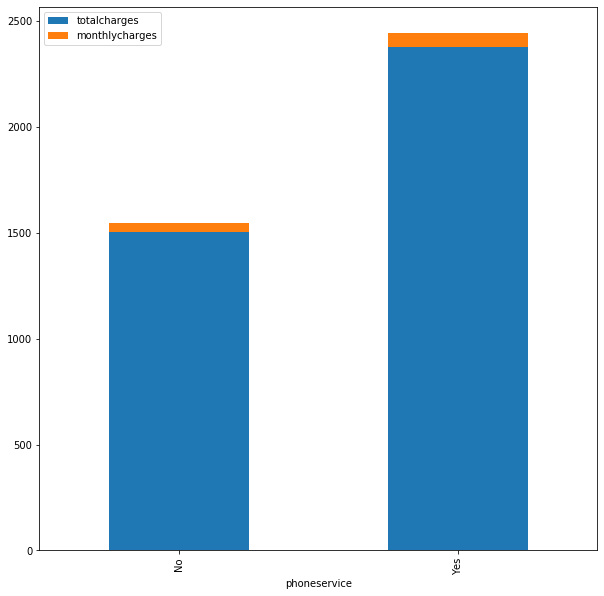

In [65]:
internet_checks = df.groupby(['phoneservice'])[['totalcharges','monthlycharges']].mean().plot(kind='bar',stacked=True,figsize=(10,10))
internet_checks

**Note : banyak cutomer yang memilih phone service churn, karena total charge dan monthly charges yang tinggi dibanding no phone service**

### #2.Multiple Lines

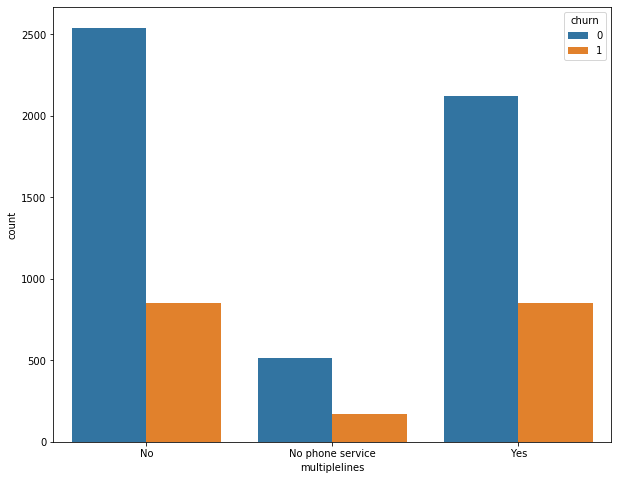

In [66]:
plt.figure(figsize=(10,8))

sns.countplot(df.multiplelines, hue=df.churn)

In [67]:
pd.crosstab(df.churn, df.multiplelines, margins=True)

multiplelines,No,No phone service,Yes,All
churn,,,,
0,2541,512,2121,5174
1,849,170,850,1869
All,3390,682,2971,7043


In [68]:
print ('customer yang churn menggunakan multiple lines adalah  {}%'.format(850/2971*100)) 
print ('customer yang churn dengan no phone service {}%'.format(170/682*100))
print ('customer yang churn tanpa menggunakan multiple lines adalah  {}%'.format(849/3390*100)) 

customer yang churn menggunakan multiple lines adalah  28.6098956580276%
customer yang churn dengan no phone service 24.926686217008797%
customer yang churn tanpa menggunakan multiple lines adalah  25.04424778761062%


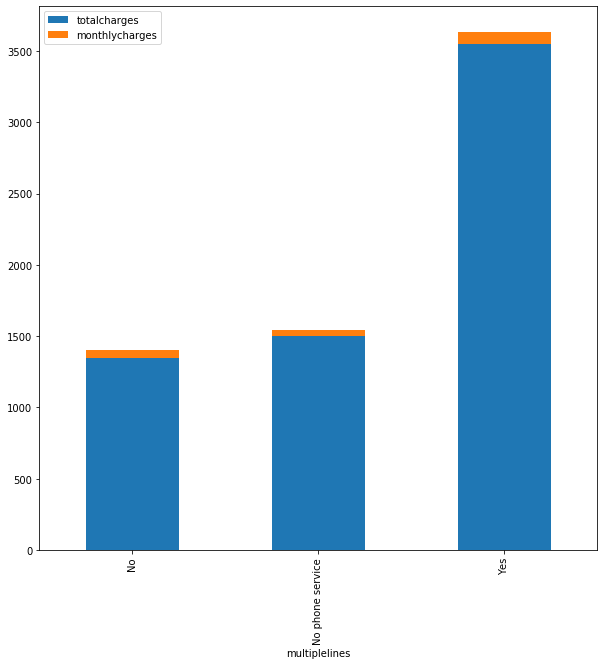

In [69]:
internet_checks = df.groupby(['multiplelines'])[['totalcharges','monthlycharges']].mean().plot(kind='bar',stacked=True,figsize=(10,10))
internet_checks

**Note : customer yang churn cenderung menggunakan multiple lines**

### #3. Internet Service

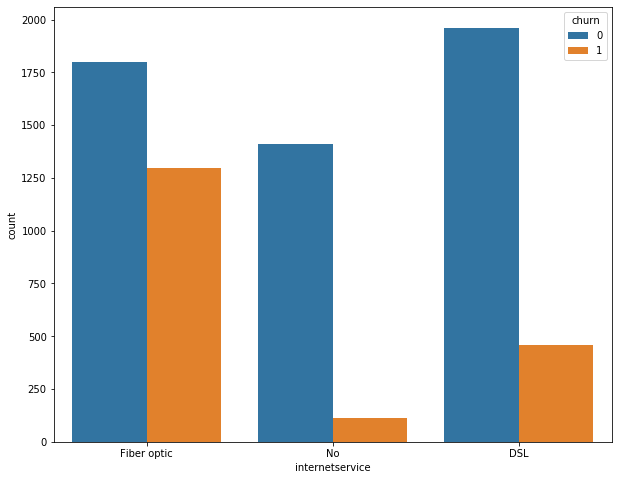

In [70]:
plt.figure(figsize=(10,8))

sns.countplot(df.internetservice, hue=df.churn)

In [71]:
pd.crosstab(df.churn, df.internetservice, margins=True)

internetservice,DSL,Fiber optic,No,All
churn,,,,
0,1962,1799,1413,5174
1,459,1297,113,1869
All,2421,3096,1526,7043


In [72]:
print ('customer yang churn dengan fiber optic adalah  {}%'.format(1297/3096*100)) 
print ('customer yang churn dengan DSL adalah {}%'.format(459/2421*100))
print ('customer yang churn tanpa internet service adalah {}%'.format(113/1526*100))

customer yang churn dengan fiber optic adalah  41.89276485788114%
customer yang churn dengan DSL adalah 18.95910780669145%
customer yang churn tanpa internet service adalah 7.404980340760157%


In [73]:
df['internetservice'].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: internetservice, dtype: float64

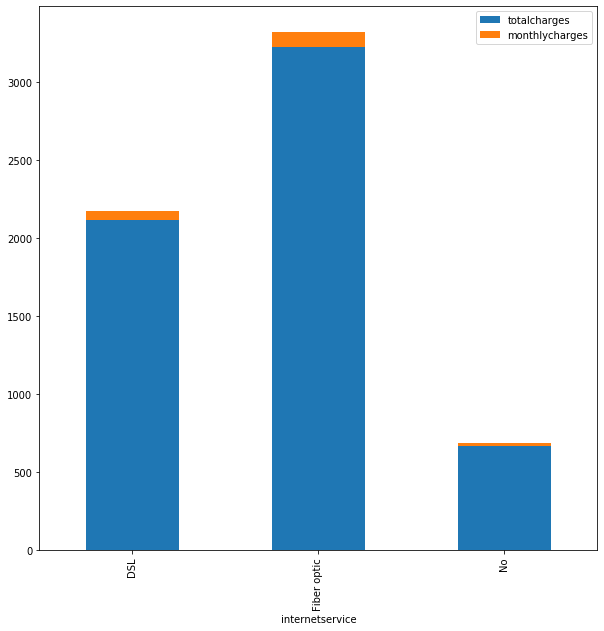

In [74]:
internet_checks = df.groupby(['internetservice'])[['totalcharges','monthlycharges']].mean().plot(kind='bar',stacked=True,figsize=(10,10))
internet_checks

**Note**
1. Jumlah yang tidak menggunakan internet service sekitar 21%
2. customer yang churn cenderung kepada pengguna fiber optic dibandingkan DSL.
3. total charges dan monthlycharges pada fiber optic tinggi dibandingkan yang lainnya.

In [75]:
# additional Value
coloms = ['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingmovies','streamingtv']
df1 = pd.melt(df[df['internetservice']!= 'No'][coloms]).rename({'value':'Has service'}, axis =1)
df1

,variable,Has service
0,onlinesecurity,No
1,onlinesecurity,No
2,onlinesecurity,No
3,onlinesecurity,No
4,onlinesecurity,No
...,...,...
33097,streamingtv,Yes
33098,streamingtv,Yes
33099,streamingtv,No
33100,streamingtv,Yes


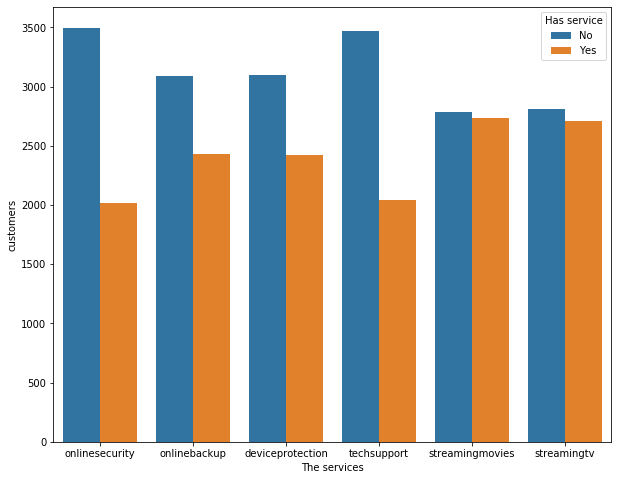

In [76]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='The services', ylabel='customers')
plt.show()

In [77]:
df1 = df[(df.internetservice != 'No') & (df.churn == 1)]
df1 = pd.melt(df1[coloms]).rename({'value': 'Has service'}, axis=1)
df1

,variable,Has service
0,onlinesecurity,No
1,onlinesecurity,No
2,onlinesecurity,No
3,onlinesecurity,No
4,onlinesecurity,No
...,...,...
10531,streamingtv,Yes
10532,streamingtv,Yes
10533,streamingtv,Yes
10534,streamingtv,Yes


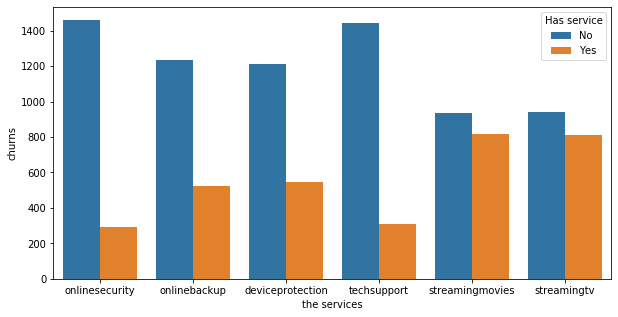

In [78]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='the services', ylabel='churns')
plt.show()

**Note :**
1. pada beberapa feature service ( online security, online backup, device protection, tech support) sepertinya tidak cenderung untuk churn
2. pada feature streaming tingkat churn hampir sama dengan tidak churn. 

In [79]:
#paperlessbilling

In [80]:
df['paperlessbilling'].value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: paperlessbilling, dtype: float64

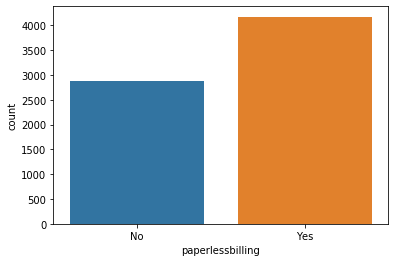

In [81]:
sns.countplot(df['paperlessbilling'])

In [82]:
pd.crosstab(df.churn, df.paperlessbilling, margins=True)

paperlessbilling,No,Yes,All
churn,,,
0,2403,2771,5174
1,469,1400,1869
All,2872,4171,7043


In [83]:
print ('customer yang churn dengan menggunakan paperlessbilling adalah  {}%'.format(1400/4171*100)) 
print ('customer yang churn dengan non-paperlessbilling adalah  {}%'.format(469/2872*100)) 

customer yang churn dengan menggunakan paperlessbilling adalah  33.565092304003834%
customer yang churn dengan non-paperlessbilling adalah  16.33008356545961%


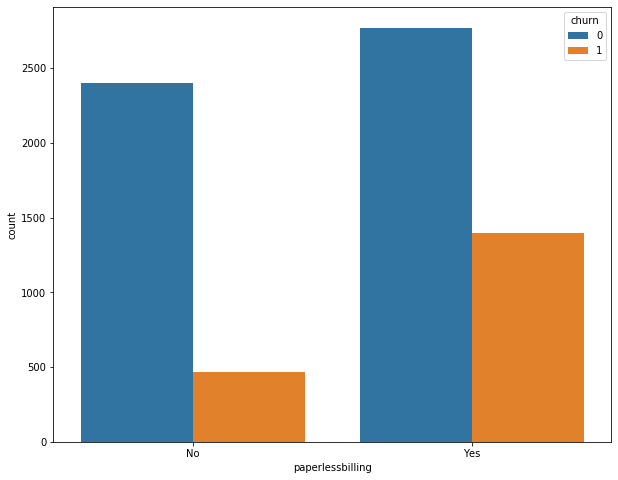

In [84]:
plt.figure(figsize=(10,8))

sns.countplot(df.paperlessbilling, hue=df.churn)

**Note: customer yang menggunakan paperless billing punya kecenderungan untuk churn**

In [85]:
#payment method

In [86]:
df['paymentmethod'].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: paymentmethod, dtype: float64

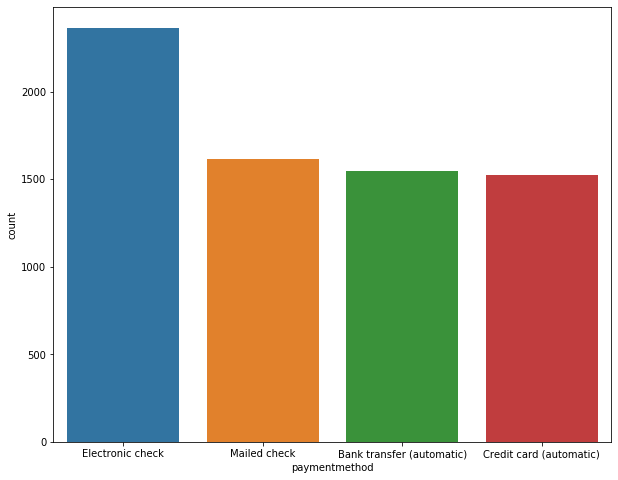

In [87]:
plt.figure(figsize=(10,8))
sns.countplot(df['paymentmethod'])

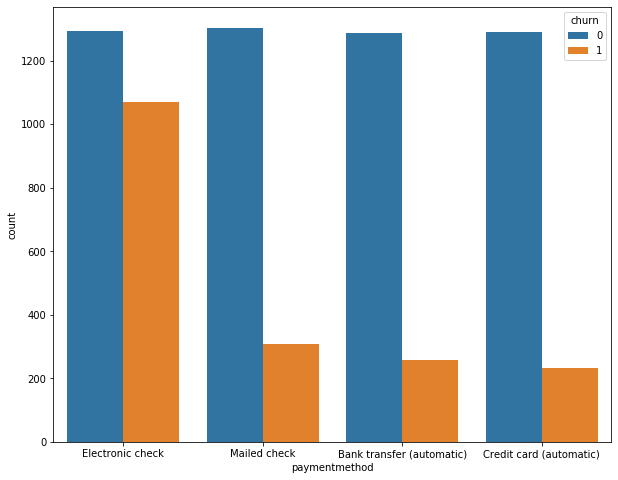

In [88]:
plt.figure(figsize=(10,8))
sns.countplot(df.paymentmethod, hue=df.churn)

**Note**
1. paling banyak menggunakan electronic check
2. churn paling banyak juga menggunakan electronick check
3. churn yang sedikit biasanya menggunakan bank transfer atau credit card

# **Data Preparation**

## encode

## #1. label encode

In [89]:
df.head(2)

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.0,12.0,0
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.0,13.0,0


In [90]:
df.drop(columns=['customerid'], inplace=True)

In [91]:
df.head(2)

,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,France,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,No,Electronic check,12.0,12.0,0
1,France,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.0,13.0,0


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
label_encodes = ['partner','paperlessbilling','dependents','phoneservice','gender']

le = LabelEncoder()

for kolom in label_encodes:
    df[kolom] = le.fit_transform(df[kolom])


In [94]:
df.head()

,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,France,1,1,0,0,1,1,No,Fiber optic,No,No,No,Yes,No,No,0,Electronic check,12.00,12.00,0
1,France,0,0,1,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,Electronic check,13.00,13.00,0
2,Germany,1,0,1,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,Mailed check,18.80,18.80,0
3,Germany,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,Electronic check,18.85,18.85,0
4,Germany,1,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,Mailed check,18.85,18.85,1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   int32  
 4   dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   int32  
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  paperlessbilling  7043 non-null   int32  
 16  paymentmethod     7043 non-null   object 


### One Hot

In [96]:
df = pd.get_dummies(df, columns=['region','internetservice','paymentmethod','onlinesecurity','onlinebackup','deviceprotection','multiplelines','techsupport','streamingmovies','streamingtv'])

In [97]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,multiplelines_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes
0,1,1,0,0,1,1,0,12.00,12.00,0,...,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,1,0,13.00,13.00,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,1,1,1,1,0,18.80,18.80,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,1,1,0,18.85,18.85,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,1,1,18.85,18.85,1,...,0,0,1,0,0,1,0,0,1,0


# Scaling

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scale = MinMaxScaler()

df['monthlycharges'] = scale.fit_transform(np.array(df['monthlycharges']).reshape(-1,1))
df['totalcharges'] = scale.fit_transform(np.array(df['totalcharges']).reshape(-1,1))

In [101]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,multiplelines_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes
0,1,1,0,0,1,1,0,0.000000,0.000000,0,...,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,1,0,0.009368,0.000045,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,1,1,1,1,0,0.063700,0.000304,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,1,1,0,0.064169,0.000307,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,1,1,0.064169,0.000307,1,...,0,0,1,0,0,1,0,0,1,0


In [102]:
y = df['churn'] #sebagai label
X = df.drop(columns=['churn']) #sebagai fitur

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Modeling and Evaluation

## Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
log_reg = LogisticRegression()

In [117]:
log_reg.fit(X_train,y_train)

C:\Users\niken\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

Text(0.5, 1.0, 'confusion matrix logreg')

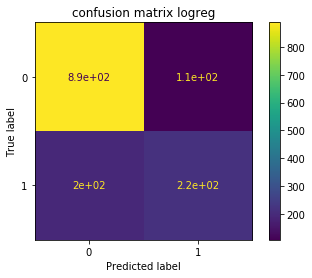

In [119]:
plot_confusion_matrix(log_reg,X_test,y_test)
plt.title('confusion matrix logreg')

In [120]:
log_reg_predict = log_reg.predict(X_test)
print (log_reg_predict)

[1 1 0 ... 0 0 0]


In [121]:
print (classification_report(y_test,log_reg_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       995
           1       0.67      0.53      0.59       414

    accuracy                           0.79      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [122]:
print (roc_auc_score(y_test,log_reg_predict))

0.710018692496298


## KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'confussion matrix KNN')

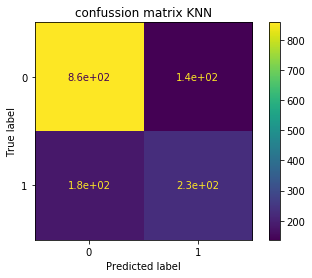

In [124]:
plot_confusion_matrix(neigh,X_test,y_test) #memprediksi dengan labelnya 
plt.title("confussion matrix KNN")

In [125]:
knn_predict = neigh.predict(X_test)

In [126]:
print (classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       995
           1       0.63      0.56      0.59       414

    accuracy                           0.77      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.77      0.77      0.77      1409



In [127]:
print (roc_auc_score(y_test,knn_predict))

0.7089335566722502


## Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
tree = DecisionTreeClassifier()

In [130]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'confussion matrix tree')

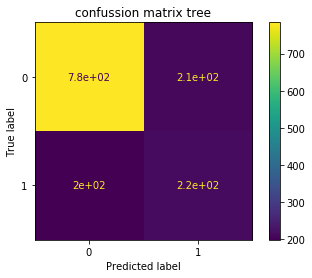

In [131]:
#prediction
plot_confusion_matrix(tree,X_test,y_test) #memprediksi dengan labelnya 
plt.title("confussion matrix tree")

In [132]:
tree_predict = tree.predict(X_test)

In [133]:
print (classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       995
           1       0.50      0.52      0.51       414

    accuracy                           0.71      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.71      0.71      0.71      1409



In [134]:
print (roc_auc_score(y_test,tree_predict))

0.6536316849950234
